In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Importing and manipulating the dataset
-----

In [141]:
# importing the dataset
df = pd.read_csv('E-commerce_Customer_Behavior.csv')
df.head(15)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
6,107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
9,110,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9,Satisfied


In [142]:
df.shape

(350, 11)

In [143]:
df.info()
# here we can see that there are values missing in the satisfaction level column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [144]:
# we fill those values with the 'undefined' label
df['Satisfaction Level'] = df['Satisfaction Level'].fillna(value='Undefined')
df.info()
# we can now see in the output that there arent any missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        350 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [145]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


Data preprocessing
-----

In [146]:
# let's create our matrix of features

X = df.drop('Customer ID', axis=1)
X.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [147]:
# encoding categorical data
# then scaling the data such that the algorithm won't weight one feature more heavily than another and avoid disproportions
# this also helps the distance metrics (wcss) more meaningful 

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Gender','City','Membership Type','Discount Applied','Satisfaction Level']),
                                    ('scaler', StandardScaler(), ['Age','Total Spend','Items Purchased','Average Rating','Days Since Last Purchase'])],
                        remainder='passthrough')
X = ct.fit_transform(X)

X



array([[ 1.        ,  0.        ,  0.        , ...,  0.3373459 ,
         1.00198115, -0.11835933],
       [ 0.        ,  1.        ,  0.        , ..., -0.38553817,
         0.13947893, -0.63990676],
       [ 1.        ,  0.        ,  1.        , ..., -0.86746089,
        -1.06802418,  1.14825585],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.81926861,
         0.82948071,  0.10516099],
       [ 0.        ,  1.        ,  0.        , ..., -0.38553817,
         0.31197937, -0.41638644],
       [ 1.        ,  0.        ,  1.        , ..., -0.62649953,
        -1.24052462,  1.66980327]])

Now let's use K-means clustering to cluster our dataset !
-----

In [148]:
# first we have to find the adequate number of cluster for our model 
# we choose to use the elbow method

def find_k(matrix):
    wcss = []

    for i in range(1,11):
        kmeans = KMeans(init='k-means++', n_clusters= i, random_state=42)
        kmeans.fit(matrix)
        wcss.append(kmeans.inertia_)

    return wcss

C:\Users\slmli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\slmli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\slmli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

C:\Users\slmli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\slmli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\slmli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

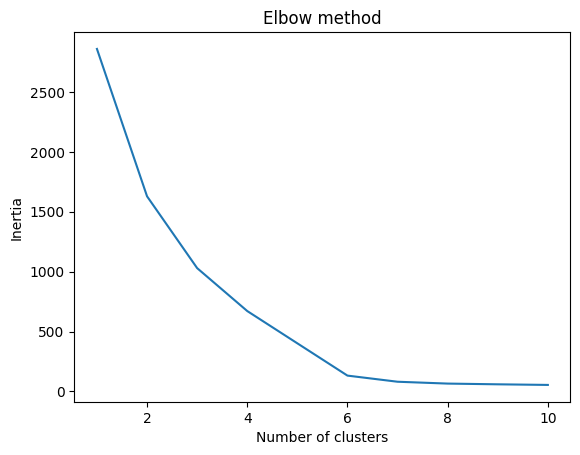

In [149]:
# now let's plot it 

inertias = find_k(X)
n_cluster = list(range(1,11))

plt.plot(n_cluster, inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

In [150]:
# we can see above that the right number of clusters is 6
# above 6 clusters, the curve starts to flatten out 

# now let's cluster our matrix of features 
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X)

C:\Users\slmli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [151]:
print(len(y_means))

350


In [152]:
print(y_means)

[1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1
 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2
 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4
 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5
 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3
 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1
 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2
 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4
 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4 5
 3 0 1 2 4 5 3 0 1 2 4 5 3 0 1 2 4]


In [153]:
# transforming y_means into a 2D numpy array 

y_means = y_means.reshape(350,1)
y_means

array([[1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
       [0],
       [1],
       [2],
       [4],
       [5],
       [3],
    

In [154]:
# let's add a cluster column to our matrix of features 

X = np.append(X, y_means, axis=1)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.00198115,
        -0.11835933,  1.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.13947893,
        -0.63990676,  2.        ],
       [ 1.        ,  0.        ,  1.        , ..., -1.06802418,
         1.14825585,  4.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.82948071,
         0.10516099,  1.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.31197937,
        -0.41638644,  2.        ],
       [ 1.        ,  0.        ,  1.        , ..., -1.24052462,
         1.66980327,  4.        ]])

Let's visualise our data now
-----

In [155]:
import seaborn as sns

encoded_columns = ct.named_transformers_['encoder'].get_feature_names_out()
scaled_columns = ['Age','Total Spend','Items Purchased','Average Rating','Days Since Last Purchase','Cluster']
columns = np.concatenate([encoded_columns, scaled_columns])
new_df = pd.DataFrame(X, columns=columns)
new_df



,Gender_Female,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,...,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Undefined,Satisfaction Level_Unsatisfied,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.945152,0.760130,0.337346,1.001981,-0.118359,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.082826,-0.179459,-0.385538,0.139479,-0.639907,2.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.933185,-0.925570,-0.867461,-1.068024,1.148256,4.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.739557,1.756144,1.542153,1.174482,-1.086947,5.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.356343,-0.345692,0.096385,-0.033022,2.116844,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.328365,-0.511924,-0.626500,-0.378022,1.148256,3.0
346,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.494017,-1.036899,-1.108422,-1.758026,0.030654,0.0
347,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.739557,0.955405,0.819269,0.829481,0.105161,1.0
348,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.082826,-0.180289,-0.385538,0.311979,-0.416386,2.0


<Axes: >

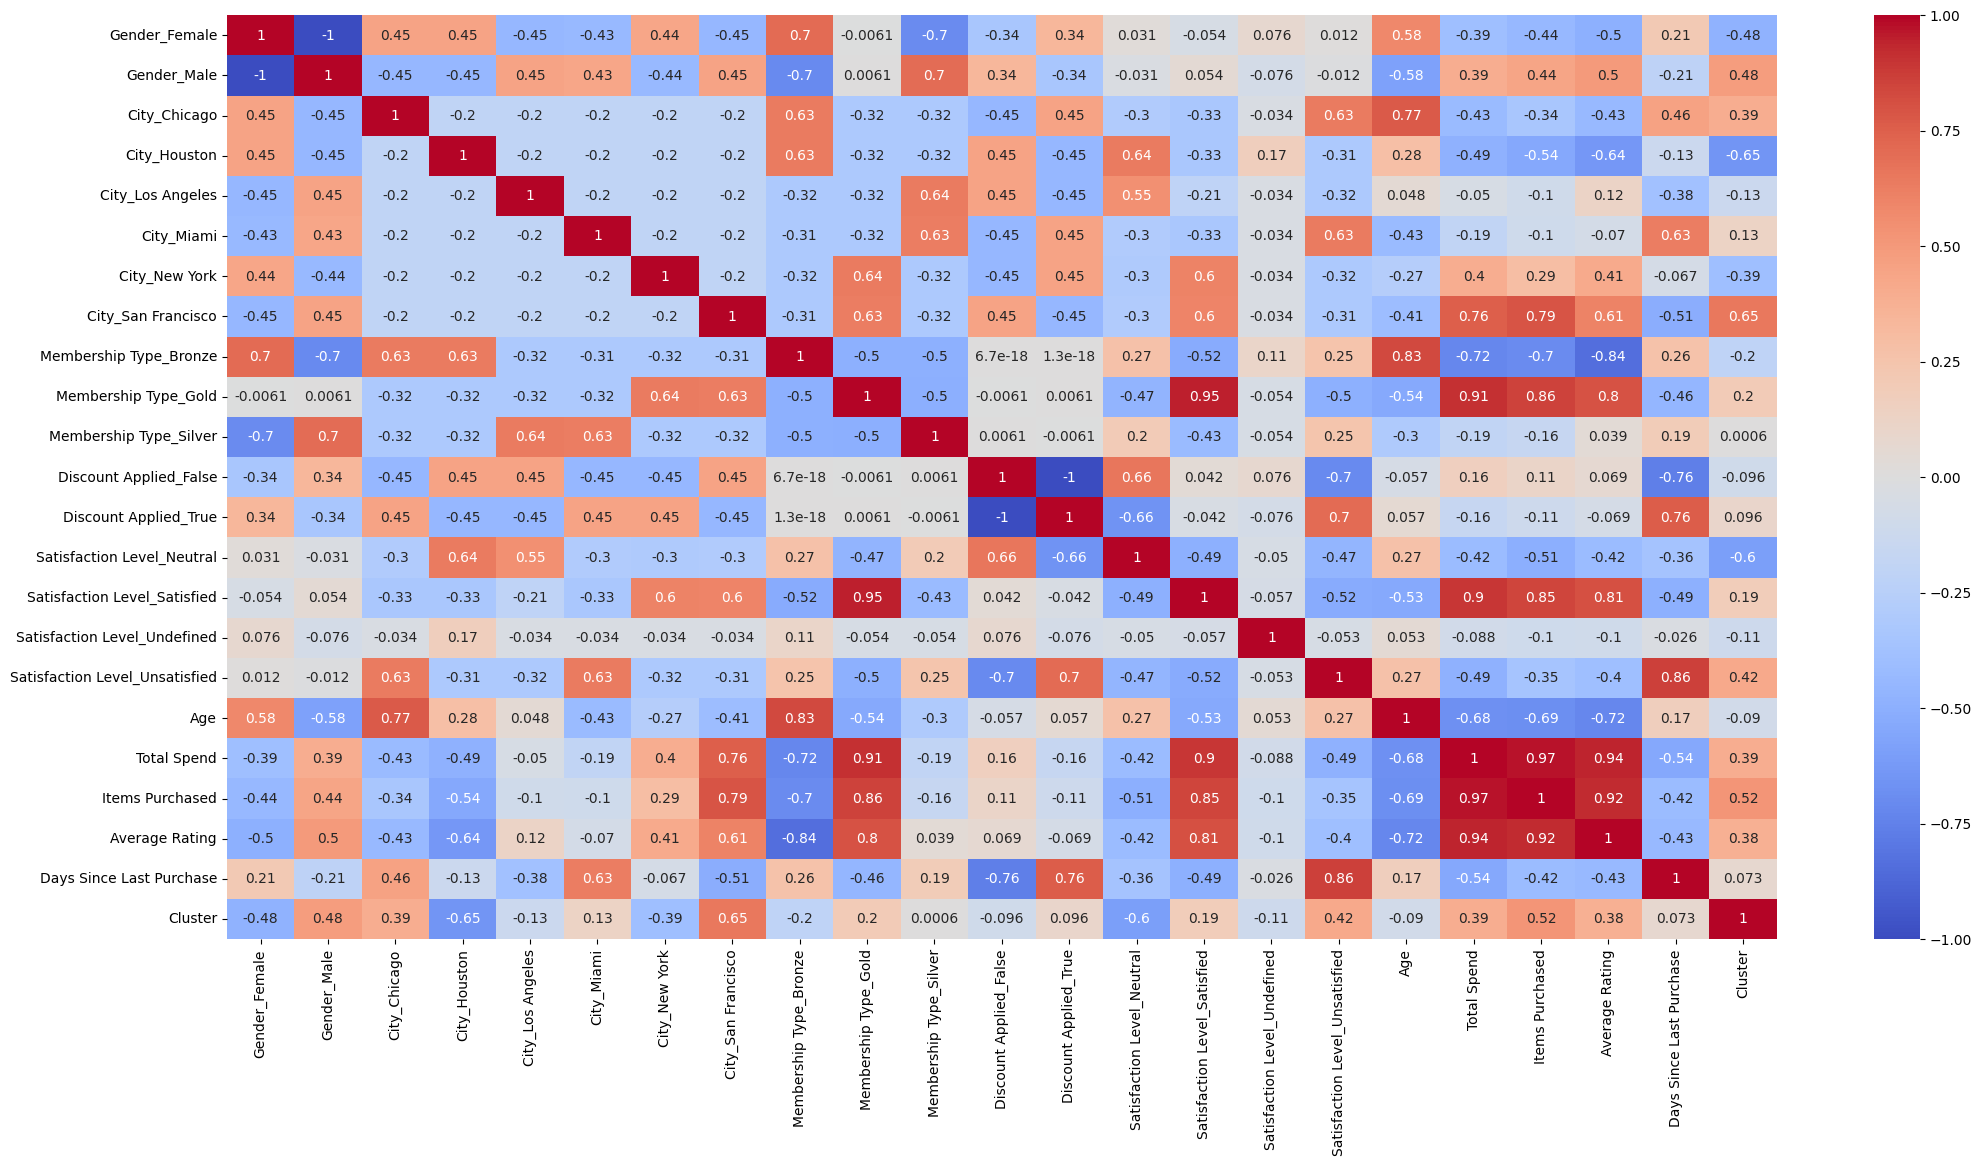

In [156]:
# visualising the correlation between each of the features 
plt.figure(figsize=(25,12))
sns.heatmap(new_df.corr(),annot=True, cmap='coolwarm')

In [157]:
df.insert(0,'Cluster', y_means)
df

,Cluster,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,1,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,2,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,4,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,5,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,3,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...
345,3,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,0,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,1,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,2,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [158]:
# let's see now our clusters separately on our dataframe
print(len(df[df['Cluster'] == 0]))
df[df['Cluster'] == 0]

58


,Cluster,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
5,0,106,Female,37,Houston,Bronze,440.8,8,3.1,False,22,Neutral
11,0,112,Female,36,Houston,Bronze,470.5,7,3.2,False,20,Neutral
17,0,118,Female,38,Houston,Bronze,450.9,8,3.0,False,25,Neutral
23,0,124,Female,37,Houston,Bronze,430.8,7,3.4,False,23,Neutral
29,0,130,Female,36,Houston,Bronze,460.5,8,3.1,False,19,Neutral
35,0,136,Female,38,Houston,Bronze,440.9,8,3.2,False,24,Neutral
41,0,142,Female,37,Houston,Bronze,420.8,7,3.1,False,21,Neutral
47,0,148,Female,36,Houston,Bronze,470.5,8,3.0,False,18,Neutral
53,0,154,Female,37,Houston,Bronze,430.8,7,3.4,False,23,Neutral
59,0,160,Female,36,Houston,Bronze,460.5,8,3.1,False,19,Neutral


In [159]:
print(len(df[df['Cluster'] == 1]))
df[df['Cluster'] == 1]

59


,Cluster,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,1,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
6,1,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,Satisfied
12,1,113,Female,30,New York,Gold,1200.8,16,4.3,True,21,Satisfied
18,1,119,Female,32,New York,Gold,1170.3,14,4.7,True,29,Satisfied
24,1,125,Female,31,New York,Gold,1140.6,15,4.6,True,27,Satisfied
30,1,131,Female,30,New York,Gold,1190.8,16,4.5,True,20,Satisfied
36,1,137,Female,32,New York,Gold,1160.3,14,4.4,True,22,Satisfied
42,1,143,Female,31,New York,Gold,1130.6,15,4.5,True,26,Satisfied
48,1,149,Female,30,New York,Gold,1180.8,16,4.7,True,19,Satisfied
54,1,155,Female,31,New York,Gold,1140.6,15,4.6,True,27,Satisfied


In [160]:
print(len(df[df['Cluster'] == 2]))
df[df['Cluster'] == 2]

59


,Cluster,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
1,2,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
7,2,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
13,2,114,Male,33,Los Angeles,Silver,820.75,13,4.4,False,15,Satisfied
19,2,120,Male,34,Los Angeles,Silver,790.20,11,4.0,False,16,Neutral
25,2,126,Male,35,Los Angeles,Silver,810.90,12,4.3,False,13,Neutral
31,2,132,Male,33,Los Angeles,Silver,830.75,13,4.2,False,14,Satisfied
37,2,138,Male,34,Los Angeles,Silver,800.20,11,4.1,False,17,Neutral
43,2,144,Male,35,Los Angeles,Silver,820.90,12,4.3,False,12,Neutral
49,2,150,Male,34,Los Angeles,Silver,790.20,11,4.0,False,15,Neutral
55,2,156,Male,35,Los Angeles,Silver,810.90,12,4.3,False,13,Neutral


In [161]:
print(len(df[df['Cluster'] == 3]))
df[df['Cluster'] == 3]

58


,Cluster,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
4,3,105,Male,27,Miami,Silver,720.4,13,4.0,True,55,Unsatisfied
10,3,111,Male,32,Miami,Silver,690.3,11,3.8,True,34,Unsatisfied
16,3,117,Male,26,Miami,Silver,700.6,12,3.7,True,48,Unsatisfied
22,3,123,Male,27,Miami,Silver,710.4,13,4.1,True,54,Unsatisfied
28,3,129,Male,32,Miami,Silver,670.3,10,3.8,True,33,Unsatisfied
34,3,135,Male,26,Miami,Silver,690.6,12,3.9,True,47,Unsatisfied
40,3,141,Male,27,Miami,Silver,700.4,13,4.0,True,53,Unsatisfied
46,3,147,Male,32,Miami,Silver,680.3,10,3.8,True,32,Unsatisfied
52,3,153,Male,27,Miami,Silver,710.4,13,4.1,True,54,Unsatisfied
58,3,159,Male,32,Miami,Silver,670.3,10,3.8,True,33,Unsatisfied


In [162]:
print(len(df[df['Cluster'] == 4]))
df[df['Cluster'] == 4]

58


,Cluster,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
2,4,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
8,4,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
14,4,115,Female,42,Chicago,Bronze,530.40,9,3.5,True,38,Unsatisfied
20,4,121,Female,43,Chicago,Bronze,505.75,10,3.3,True,41,Unsatisfied
26,4,127,Female,41,Chicago,Bronze,485.25,9,3.6,True,39,Unsatisfied
32,4,133,Female,42,Chicago,Bronze,520.40,9,3.5,True,37,Unsatisfied
38,4,139,Female,43,Chicago,Bronze,500.75,10,3.3,True,40,Unsatisfied
44,4,145,Female,41,Chicago,Bronze,480.25,9,3.6,True,38,Unsatisfied
50,4,151,Female,43,Chicago,Bronze,505.75,10,3.3,True,39,Unsatisfied
56,4,157,Female,41,Chicago,Bronze,485.25,9,3.6,True,39,Unsatisfied


In [163]:
print(len(df[df['Cluster'] == 5]))
df[df['Cluster'] == 5]

58


,Cluster,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
3,5,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied
9,5,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied
15,5,116,Male,29,San Francisco,Gold,1360.2,18,4.9,False,11,Satisfied
21,5,122,Male,30,San Francisco,Gold,1470.5,20,4.8,False,13,Satisfied
27,5,128,Male,28,San Francisco,Gold,1500.1,21,4.9,False,10,Satisfied
33,5,134,Male,29,San Francisco,Gold,1370.2,18,4.7,False,10,Satisfied
39,5,140,Male,30,San Francisco,Gold,1460.5,20,4.8,False,12,Satisfied
45,5,146,Male,28,San Francisco,Gold,1490.1,21,4.9,False,9,Satisfied
51,5,152,Male,30,San Francisco,Gold,1470.5,20,4.8,False,13,Satisfied
57,5,158,Male,28,San Francisco,Gold,1500.1,21,4.9,False,10,Satisfied
